In [1]:
import numpy as np
import pandas as pd

In [90]:
df = pd.read_csv('C:\\Users\\Администратор\\Desktop\\la_crime_200_recs.csv')

In [86]:
df

,dr_number,date_reported,date_occurred,time_occurred,area_id,area_name,reporting_district,crime_code,crime_code_description,mo_codes,...,weapon_description,status_code,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,address,cross_street,location
0,1208575,3/14/13,3/11/13,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,1/25/10,1/22/10,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,3/19/13,3/18/13,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/10,11/10/10,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,1/11/14,1/4/14,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),329,...,NaN,IC,Invest Cont,745,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,130100866,4/28/13,4/28/13,100,1,Central,153,888,TRESPASSING,NaN,...,NaN,IC,Invest Cont,888,NaN,NaN,NaN,500 S BROADWAY,NaN,"(34.0481, -118.2507)"
195,130100872,5/4/13,5/4/13,1300,1,Central,162,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0104 0344 1300 0326,...,NaN,AA,Adult Arrest,341,NaN,NaN,NaN,400 W 7TH ST,NaN,"(34.0459, -118.2545)"
196,101220336,7/29/10,7/29/10,2000,12,77th Street,1259,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510,NaN,NaN,NaN,78TH,CENTRAL,"(33.9685, -118.2564)"
197,130100874,5/5/13,5/5/13,1015,1,Central,166,624,BATTERY - SIMPLE ASSAULT,0416 0603,...,MACE/PEPPER SPRAY,IC,Invest Cont,624,NaN,NaN,NaN,5TH ST,S SAN JULIAN ST,"(34.0446, -118.245)"


In [87]:
print ('5.1 Количество строк и столбцов в таблице')
row = df.shape[0]
cols = df.shape[1]
print (f'Столбцы: {row}, колонки: {cols}')

5.1 Количество строк и столбцов в таблице
Столбцы: 199, колонки: 26


In [50]:
print ('5.1 Типы данных у столбцов')
df.dtypes

5.1 Типы данных у столбцов


dr_number                   int64
date_reported              object
date_occurred              object
time_occurred               int64
area_id                     int64
area_name                  object
reporting_district          int64
crime_code                  int64
crime_code_description     object
mo_codes                   object
victim_age                float64
victim_sex                 object
victim_descent             object
premise_code                int64
premise_description        object
weapon _used_code         float64
weapon_description         object
status_code                object
status_description         object
crime_code_1                int64
crime_code_2              float64
crime_code_3              float64
crime_code_4              float64
address                    object
cross_street               object
location                   object
dtype: object

In [91]:
print 
df.isnull().sum().sum()

1187

In [46]:
print ('Верно ли, что женщины чаще оказываются жертвами по сравнению с мужчинами?')
pol_counts = df['victim_sex'].value_counts()
male_count = pol_counts.get('M', 0)
female_count = pol_counts.get('F', 0)
print(f'Женщин: {female_count}, мужчин: {male_count}')

if {female_count}>{male_count}:
    print ('Предположение верно')
else:
    print ('Предпололжение не верно')

Верно ли, что женщины чаще оказываются жертвами по сравнению с мужчинами?
Женщин: 54, мужчин: 82
Предпололжение не верно


Как различается вероятность женщин и мужчин стать жертвой в зависимости от возраста? Постройте визуализацию. В каком возрастном промежутке мужчины чаще становятся жетрвами преступлений?


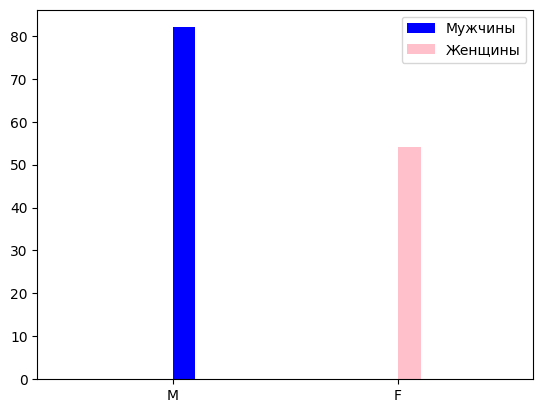

In [28]:
print ('5.3 Как различается вероятность женщин и мужчин стать жертвой в зависимости от возраста? Постройте визуализацию. В каком возрастном промежутке мужчины чаще становятся жетрвами преступлений?')
import matplotlib.pyplot as plt
male = df[df['victim_sex'] == 'M']
female = df[df['victim_sex'] == 'F']
plt.hist (male['victim_sex'], color='blue', label='Мужчины')
plt.hist (female['victim_sex'], color='pink', label='Женщины')
plt.legend()

In [34]:
bins = [0, 18, 35, 60, 75, 89, 100]
labels = ['0-18', '19-35', '36-60', '61-75', '76-89', '89+']
df['age_group'] = pd.cut(df['victim_age'], bins=bins, labels=labels, right=False)
male_victims= df[df['victim_sex'] == 'M']
male_age = male_victims['age_group'].value_counts()
common_victim_among_males=male_age.idxmax()
print(f'Мужчины чаще становятся жетрвами преступлений в возрасте {common_victim_among_males}')

Мужчины чаще становятся жетрвами преступлений в возрасте 19-35


In [84]:
female = df[df['victim_sex'] == 'F']

female_crime_code = female['crime_code']
female_crime_code.value_counts()
conutcrim = female_crime_code.value_counts()
print(f'женщины страдают от {conutcrim[:1]}')

male = df[df['victim_sex'] == 'M']

male_crime_code = male['crime_code'] 
male_crime_code.value_counts()
conutcrim = male_crime_code.value_counts()
print(f'мужчины страдают от {conutcrim[:1]}')

женщины страдают от crime_code
626    17
Name: count, dtype: int64
мужчины страдают от crime_code
624    18
Name: count, dtype: int64


In [102]:
female = df[df['victim_sex'] == 'F']

female_victim_age = female['victim_age']
female_victim_age.value_counts()
fvictimage = female_victim_age.value_counts()
fvictimage



victim_age
22.0    3
48.0    3
29.0    3
21.0    3
33.0    3
46.0    3
50.0    2
20.0    2
32.0    2
18.0    2
45.0    2
53.0    2
49.0    2
27.0    2
35.0    2
38.0    1
41.0    1
31.0    1
10.0    1
59.0    1
52.0    1
30.0    1
36.0    1
56.0    1
60.0    1
24.0    1
34.0    1
39.0    1
19.0    1
42.0    1
Name: count, dtype: int64